# HW 7

### Deadline: 15.12.24, 23:59 Uhr

In [296]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression   # for regression_2
from sklearn.neighbors import KNeighborsClassifier  # for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [297]:
# create folder to save plots

path = '.\HW7_plots'
if not os.path.exists(path):
    os.makedirs(path)

<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_29404\2694592726.py:3: SyntaxWarning: invalid escape sequence '\H'
  path = '.\HW7_plots'


In [298]:
# load csv-data as panda dataframes

df1 = pd.read_csv('regression_1.csv')
df2 = pd.read_csv('regression_2.csv')
df3 = pd.read_csv('classification.csv')

reg1_df = df1.copy()
reg2_df = df2.copy()
class_df = df3.copy()

In [316]:
# define colors for plots

blue = '#295dd4'
dark_blue = '#182c5a'
purple = '#582265'
dark_purple = '#32103a'
light_purple = '#d7b3df'
yellow = '#f4b526'
dark_yellow = '#ab7b10'
light_yellow = '#f7d17c'

<>:15: SyntaxWarning: invalid escape sequence '\H'
<>:15: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_29404\3756587519.py:15: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig('.\HW7_plots\ex1_visualised.png')


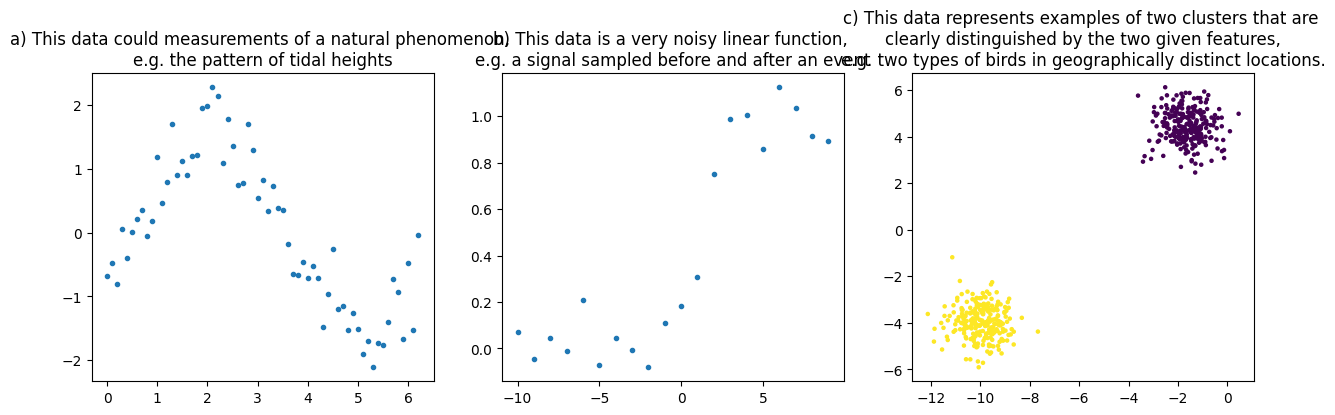

In [313]:
# plot data


fontsize = 12

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax[0].scatter(reg1_df['x1'], reg1_df['x2'], s=9)
ax[0].set_title(f'a) This data could measurements of a natural phenomenon, \ne.g. the pattern of tidal heights', fontsize=fontsize)
ax[1].scatter(reg2_df['x1'], reg2_df['x2'], s=9)
ax[1].set_title(f'b) This data is a very noisy linear function, \ne.g. a signal sampled before and after an event', fontsize=fontsize)
ax[2].scatter(class_df['x1'], class_df['x2'], c=class_df['label'], marker='o', s=5)  # cmap=cmap, norm=norm, s=5
ax[2].set_title(f'c) This data represents examples of two clusters that are \nclearly distinguished by the two given features,\ne.g. two types of birds in geographically distinct locations.', fontsize=fontsize)

plt.savefig('.\HW7_plots\ex1_visualised.png')

<>:33: SyntaxWarning: invalid escape sequence '\H'
<>:33: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_29404\2437107803.py:33: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig('.\HW7_plots\lin_reg.png')


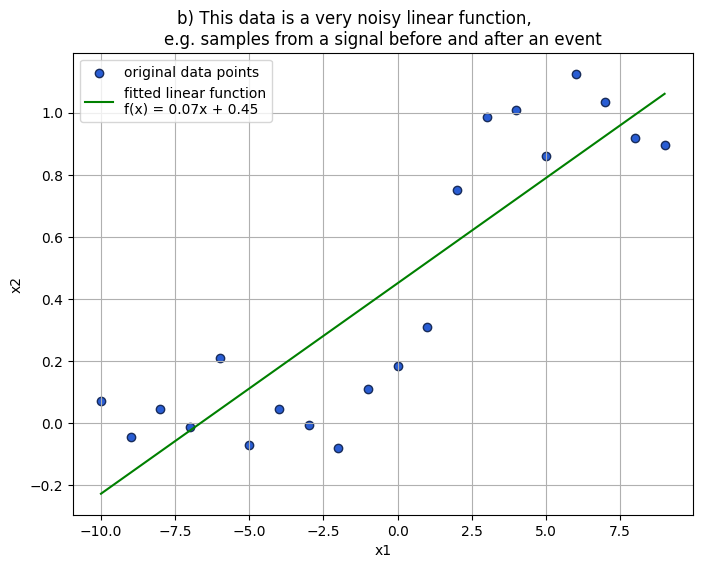

In [369]:
# Linear Regression with a linear function for data from regression2.csv

X_reg2, y_reg2 = reg2_df[['x1']], reg2_df['x2']

# perform linear regression with a linear function
lin_reg = LinearRegression()
lin_reg.fit(X_reg2, y_reg2)

line = lin_reg.predict(X_reg2)

# get coefficients of line f(x) = m*x + b
m, b = lin_reg.coef_[0], lin_reg.intercept_

def test_line(x_values, m, b):
    y_values = []
    for x in x_values:
        print(x)
        y_values.append(x * m + b)
    return y_values

# plot the points from regression 2 and the fitted linear function
plt.figure(figsize=(8, 6))
plt.scatter(reg2_df['x1'], reg2_df['x2'], color=blue, edgecolor=dark_blue, label='original data points')
plt.plot(reg2_df['x1'], line, color='green', label=f'fitted linear function\nf(x) = {m:.2f}x + {b:.2f}')
# plt.plot(reg2_df['x1'], test_line)
plt.title('b) This data is a very noisy linear function, \
          \ne.g. samples from a signal before and after an event', fontsize=fontsize)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(fontsize=fontsize-2)
plt.grid(True)

plt.savefig('.\HW7_plots\lin_reg.png')

plt.show()

In [302]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

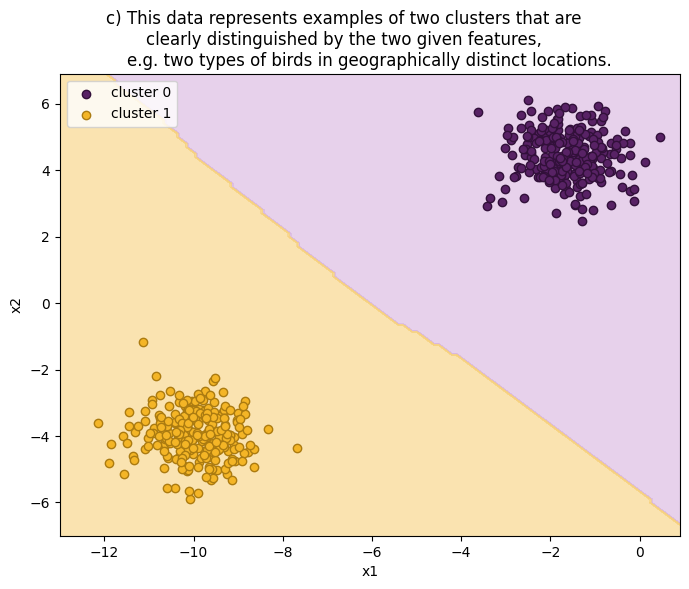

In [321]:
# kNN for data from classification.csv

# get features and values from data set
X_class = class_df.drop('label', axis=1).values
y_class = class_df['label'].values

# train kNN classifier
k = 3  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_class, y_class)

# create a mesh grid for plotting decision boundaries and predict label for each point in grid
xx, yy = np.meshgrid(np.arange(-13, 1, 0.1),
                     np.arange(-7, 7, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# define colors for plot
cmap_background = ListedColormap([light_purple, light_yellow])
colors_points = [purple, yellow, dark_purple, dark_yellow]

# create plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_background)  # plot decision boundary
# plot original data points with cluster-specific labels
for cluster in np.unique(y_class):
    # create mask that identifies which points in y_class belong to the current cluster
    cluster_mask = y_class == cluster
    plt.scatter(X_class[cluster_mask, 0], X_class[cluster_mask, 1], # only choose points (x1,x2) in current cluster
                label=f'cluster {cluster}', 
                color=colors_points[cluster], edgecolor=colors_points[cluster + 2])
plt.title(f'c) This data represents examples of two clusters that are\
          \nclearly distinguished by the two given features,\
          \ne.g. two types of birds in geographically distinct locations.', fontsize=fontsize)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(fontsize=fontsize-2)
plt.savefig('./HW7_plots/knn_clustering.png')

plt.show()

f(x) = -1.40 * x^3 + 3.71 * x^2 + 0.00 * x + -1.41


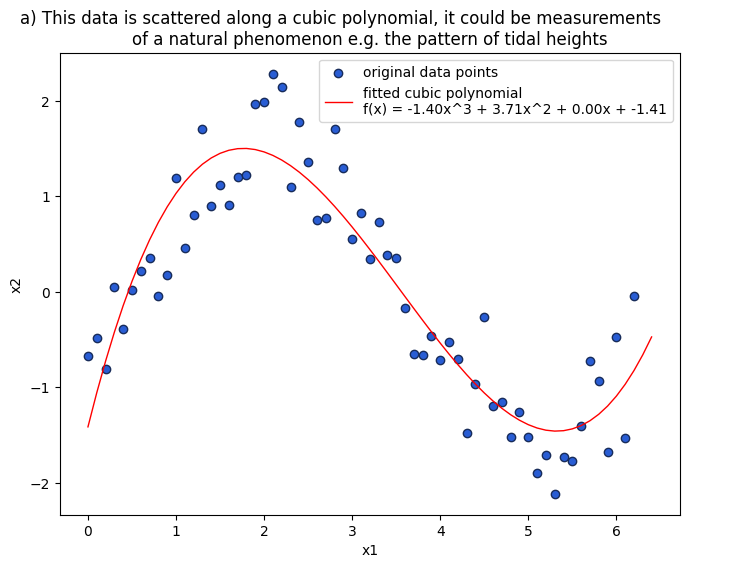

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


# PolynomialFeatures for data from regression1.csv

X_reg1 = np.array(reg1_df[['x1']])
y_reg1 = reg1_df['x2']

# create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_reg1.reshape((-1,1)))

# perform Linear Regression with a cubic polynomial
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_reg1)

x_values_poly = np.arange(0, 6.5, 0.1)
polynomial = poly_reg.predict(poly.fit_transform(x_values_poly.reshape((-1, 1))))

# get coefficients of polynomial f(x) = a*x^3 + b*x^2 c*x + d
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_
a, b, c, d = coefficients[2], coefficients[1], coefficients[0], intercept

# plot original data points from regression1 and predicted polyomial
plt.figure(figsize=(8, 6))
plt.scatter(reg1_df['x1'], reg1_df['x2'], color=blue, edgecolor=dark_blue, label='original data points')
plt.plot(x_values_poly, polynomial, '-', color='red', label=f'fitted cubic polynomial\
         \nf(x) = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f}', linewidth=1)
plt.title(f'a) This data is scattered along a cubic polynomial, it could be measurements \
          \nof a natural phenomenon e.g. the pattern of tidal heights', fontsize=fontsize)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(fontsize=fontsize-2)
plt.savefig('./HW7_plots/poly_reg.png')

plt.show()




<>:19: SyntaxWarning: invalid escape sequence '\H'
<>:19: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_29404\3801044483.py:19: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig('.\HW7_plots\ex1_visualised.png')


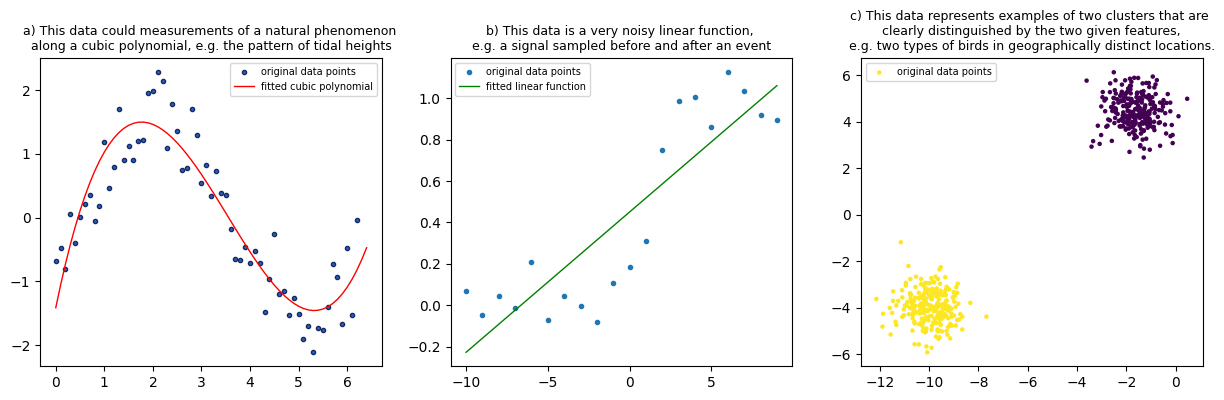

In [305]:

fontsize = 9

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax[0].scatter(reg1_df['x1'], reg1_df['x2'], color='#295dd4', edgecolor='#182c5a', label='original data points', s=9)
ax[0].plot(x_values_poly, polynomial, '-', color='red', label='fitted cubic polynomial', linewidth=1)
ax[0].set_title(f'a) This data could measurements of a natural phenomenon \nalong a cubic polynomial, e.g. the pattern of tidal heights', fontsize=fontsize)
ax[0].legend(fontsize=fontsize-2)

ax[1].scatter(reg2_df['x1'], reg2_df['x2'], label='original data points', s=9)
ax[1].plot(reg2_df['x1'], line, color='green', label='fitted linear function', linewidth=1)  # Fitted line
ax[1].set_title(f'b) This data is a very noisy linear function, \ne.g. a signal sampled before and after an event', fontsize=fontsize)
ax[1].legend(fontsize=fontsize-2)

ax[2].scatter(class_df['x1'], class_df['x2'], label='original data points', c=class_df['label'], marker='o', s=5)  # cmap=cmap, norm=norm, s=5
ax[2].set_title(f'c) This data represents examples of two clusters that are \nclearly distinguished by the two given features,\ne.g. two types of birds in geographically distinct locations.', fontsize=fontsize)
ax[2].legend(fontsize=fontsize-2)

plt.savefig('.\HW7_plots\ex1_visualised.png')
